# Desafio - Classificação de score de crédito

### Contexto

Você está trabalhando como cientista de dados em uma empresa financeira global.
Ao longo dos anos, a empresa coletou dados bancários básicos e reuniu muitas informações relacionadas a crédito. 

### Objetivo

A administração quer construir um sistema inteligente para segregar as pessoas em faixas de pontuação de crédito para reduzir os esforços manuais.
Problema a ser resolvido
Dadas as informações relacionadas ao crédito de uma pessoa, construa um modelo de aprendizado de máquina que possa classificar a pontuação de crédito. 
Analise o que faz alguém ter um score maior ou menor, a quantidade de empréstimos é relevante? O saldo mensal?

### Informações sobre as features


- ID - Id único
- Customer_ID - Identificador único de uma pessoa
- Month - O mês do ano
- Name - O nome de uma pessoa
- Age - Idade da pessoa
- SSN - O número do seguro social da pessoa
- Occupation - Ocupação da pessoa
- Annual_Income - Renda anual da pessoa
- Monthly_Inhand_Salary - O salário mensal base da pessoa
- Num_Bank_Accounts - Representa o número de contas bancárias que a pessoa tem
- Num_Credit_Card - O número de cartões de crédito que uma pessoa tem
- Interest_Rate - Juros do cartão de crédito
- Num_of_Loan - Número de empréstimos a pessoa possui
- Type_of_Loan - Os tipos de empréstimos obtidos pela pessoa
- Delay_from_due_date - Representa a quantidade de dias de atraso no pagamento do empréstimo
- Num_of_Delayed_Payment - A média de pagamentos atrasados de uma pessoa
- Changed_Credit_Limit - Variação percentual no limite do cartão de crédito
- Num_Credit_Inquiries - Número de consultas de cartão de crédito
- Credit_Mix - Classificação do mix de créditos
- Outstanding_Debt - Representa a dívida restante a ser paga (em USD)
- Credit_Utilization_Ratio - Taxa de utilização do cartão de crédito
- Credit_History_Age - Idade do histórico de crédito da pessoa
- Payment_of_Min_Amount - Se apenas o valor mínimo da parcela foi pago pela pessoa
- Total_EMI_per_month - Pagamentos mensais de EMI (em USD dólares)
- Amount_invested_monthly - Valor mensal investido pelo cliente (em USD dólares)
- Payment_Behaviour - Comportamento de pagamento do cliente (em USD)
- Monthly_Balance - Valor do saldo mensal do cliente (em USD)
- Credit_Score - Score de crédito da pessoa (Target)




## 1. Importando as bibliotecas

In [49]:
### Data Wrangling 

import numpy as np
import pandas as pd
import missingno
import datetime
from datetime import date
from collections import Counter
import random


### Remove unnecessary warnings
import warnings
warnings.filterwarnings("ignore") 
warnings.warn("this will not show")

### Data Visualization
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap
import seaborn as sns

###Preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

### Modelling 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

### Model Validation
from sklearn.model_selection import cross_val_score


## 2. Importando dataset


In [50]:

df = pd.read_csv('train.csv')

In [51]:
# Para preservar os dados brutos
df_train = df.copy()

## 3. Data Analysis



### 3.1 Data Inspection

In [52]:
# Verificando as primeiras linhas do dataset

df_train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [53]:
#Verificando o tamanho das bases

df_train.shape

(100000, 28)

In [54]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [55]:
categorical = df_train.dtypes[df_train.dtypes == "object"].index
df_train[categorical].describe().transpose()

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


In [56]:
#Subistituindo caracteres diferenciados que possivelmente foram preenchidos por serem campos obrigatórios por nan:

df_train = df_train.applymap(lambda x: x if x is np.NaN or not isinstance(x, str) else str(x).strip('_ ,"')).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)
df_train

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,NaN,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,NaN,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [57]:
#Alterar o tipo dos dados

df_train.Age = df_train.Age.astype(int)
df_train.Annual_Income = df_train.Annual_Income.astype(float)
df_train.Num_of_Loan = df_train.Num_of_Loan.astype(int)
df_train.Num_of_Delayed_Payment = df_train.Num_of_Delayed_Payment.astype(float)
df_train.Changed_Credit_Limit = df_train.Changed_Credit_Limit.astype(float)
df_train.Outstanding_Debt = df_train.Outstanding_Debt.astype(float)
df_train.Amount_invested_monthly = df_train.Amount_invested_monthly.astype(float)
df_train.Monthly_Balance = df_train.Monthly_Balance.astype(float)

In [58]:
# Tranformando a coluna de tempo de histórico de crédito de texto para tempo 

nd= df_train.copy()
nd['Credit_History_Age'] = nd['Credit_History_Age'].replace('nan', np.nan).fillna(0)   
nd['Credit_History_Age'] = nd['Credit_History_Age'].astype(str)                       
nd['History_Year'] = nd['Credit_History_Age'].str[ :2]          
nd['History_Month'] = nd['Credit_History_Age'].str[ -9:-7] 

nd['History_Year'] = pd.to_numeric(nd['History_Year']) 
nd['History_Month'] = pd.to_numeric(nd['History_Month']) 
nd['Credit_History_Age'] = nd['History_Year']*12 + nd['History_Month'] 
nd = nd.drop(['History_Year'], axis = 1)  
nd = nd.drop(['History_Month'], axis = 1)
df_train = nd

In [59]:
#Verificando datatypes após alteração do dtype

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  int32  
 5   SSN                       94428 non-null   object 
 6   Occupation                92938 non-null   object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int32  
 13  Type_of_Loan              88592 non-null   ob

In [60]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,1.106497e+02,6.862447e+02,-5.000000e+02,24.000000,33.000000,42.000000,8.698000e+03
Annual_Income,100000.0,1.764157e+05,1.429618e+06,7.005930e+03,19457.500000,37578.610000,72790.920000,2.419806e+07
Monthly_Inhand_Salary,84998.0,4.194171e+03,3.183686e+03,3.036454e+02,1625.568229,3093.745000,5957.448333,1.520463e+04
Num_Bank_Accounts,100000.0,1.709128e+01,1.174048e+02,-1.000000e+00,3.000000,6.000000,7.000000,1.798000e+03
Num_Credit_Card,100000.0,2.247443e+01,1.290574e+02,0.000000e+00,4.000000,5.000000,7.000000,1.499000e+03
Interest_Rate,100000.0,7.246604e+01,4.664226e+02,1.000000e+00,8.000000,13.000000,20.000000,5.797000e+03
Num_of_Loan,100000.0,3.009960e+00,6.264788e+01,-1.000000e+02,1.000000,3.000000,5.000000,1.496000e+03
Delay_from_due_date,100000.0,2.106878e+01,1.486010e+01,-5.000000e+00,10.000000,18.000000,28.000000,6.700000e+01
Num_of_Delayed_Payment,92998.0,3.092334e+01,2.260319e+02,-3.000000e+00,9.000000,14.000000,18.000000,4.397000e+03
Changed_Credit_Limit,97909.0,1.038903e+01,6.789496e+00,-6.490000e+00,5.320000,9.400000,14.870000,3.697000e+01


In [61]:
#verificar valores nulos organizando do que possui maior quantidade de nulos para o menor

df_train.isnull().sum().sort_values(ascending = False)

Credit_Mix                  20195
Monthly_Inhand_Salary       15002
Type_of_Loan                11408
Name                         9985
Credit_History_Age           9030
Payment_Behaviour            7600
Occupation                   7062
Num_of_Delayed_Payment       7002
SSN                          5572
Amount_invested_monthly      4479
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Monthly_Balance              1200
Outstanding_Debt                0
ID                              0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Delay_from_due_date             0
Customer_ID                     0
Num_of_Loan                     0
Interest_Rate                   0
Num_Credit_Card                 0
Num_Bank_Accounts               0
Annual_Income                   0
Age                             0
Month                           0
Credit_Score                    0
dtype: int64

### 3.2 Data Cleaning

Vimos acima que temos muitos valores nulos, para tentarmos não perder tantos dados, vamos tratar esses valores.

<AxesSubplot:>

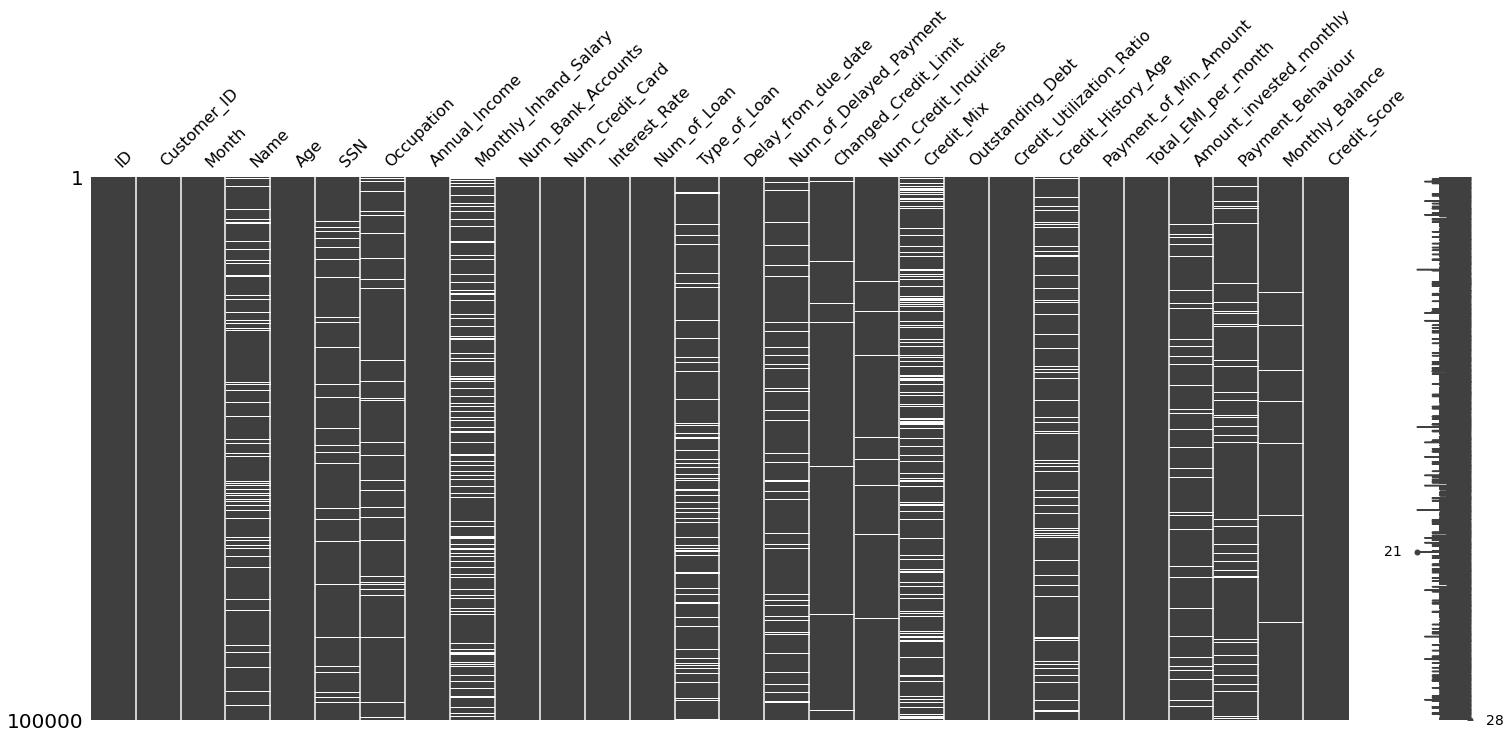

In [62]:
missingno.matrix(df_train)

In [63]:
def cleaning_Null_columns(df_column,method,headlines):
  print('Antes: \n',)
  print(df_column.value_counts(dropna = False).head(headlines))
  print('\n-----------------------------------\n')
  print('Depois: \n')
  df_column.fillna(method = method, inplace = True)
  return df_column.value_counts(dropna = False)

In [64]:
# Vamos começar pela coluna onde temos mais valores faltantes e assim continuaremos seguindo- 'Credit_Mix'
# O método ffill() substitui os valores NULL pelo valor da linha anterior

cleaning_Null_columns(df_train['Credit_Mix'],'ffill',40)

Antes: 

Standard    36479
Good        24337
NaN         20195
Bad         18989
Name: Credit_Mix, dtype: int64

-----------------------------------

Depois: 



Standard    45820
Good        30351
Bad         23828
NaN             1
Name: Credit_Mix, dtype: int64

In [65]:
#Monthly_Inhand_Salary
# Calculando a média para a coluna Monthly_Inhand_Salary, já vimos na exloratória que não temos nenhum valor negativo, por isso não faremos nenhum tratamento nesse sentido.

df_train['Monthly_Inhand_Salary'] = df_train['Monthly_Inhand_Salary'].fillna(df_train['Monthly_Inhand_Salary'].median())

In [66]:
#Type of Loan

### Buscando os dados não nulos da coluna - Tipo de dados

index_values = ~df_train['Type_of_Loan'].isnull().values
loan_type_data = list(df_train['Type_of_Loan'][index_values])
loan_type_data
# ### Criando uma lista para cada tipo de emprestimo

# auto_loan = [0] * (len(df_train))
# credit_builder_loan = [0] * (len(df_train))
# personal_loan = [0] * (len(df_train))
# home_equity_loan = [0] * (len(df_train))
# mortgage_loan = [0] * (len(df_train))
# student_loan = [0] * (len(df_train))
# debt_consolidation_loan = [0] * (len(df_train))
# payday_loan = [0] * (len(df_train))

# ### Usando 0 e 1 para saber se o cliente possui determinado tipo de emprestimo ou não

# for index in range(len(loan_type_data)):
#     if 'Auto' in loan_type_data[index]:
#         auto_loan[index] = 1
#     if 'Credit-Builder' in loan_type_data[index]:
#         credit_builder_loan[index] = 1
#     if 'Personal' in loan_type_data[index]:
#         personal_loan[index] = 1
#     if 'Home' in loan_type_data[index]:
#         home_equity_loan[index] = 1
#     if 'Mortgage' in loan_type_data[index]:
#         mortgage_loan[index] = 1
#     if 'Student' in loan_type_data[index]:
#         student_loan[index] = 1
#     if 'Debt' in loan_type_data[index]:
#         debt_consolidation_loan[index] = 1
#     if 'Payday' in loan_type_data[index]:
#         payday_loan[index] = 1

# ### Adicionando as colunas no df_train

# df_train['Auto_Loan'] = auto_loan
# df_train['Credit_Builder_Loan'] = credit_builder_loan
# df_train['Personal_Loan'] = personal_loan
# df_train['Home_Enquity_Loan'] = home_equity_loan
# df_train['Mortgage_Loan'] = mortgage_loan
# df_train['Student_Loan'] = student_loan
# df_train['Debt_Consolidation_Loan'] = debt_consolidation_loan
# df_train['Payday_Loan'] = payday_loan




['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan,

In [67]:
# 'Credit_History_Age'

df_train['Credit_History_Age'] = df_train['Credit_History_Age'].fillna(df_train['Credit_History_Age'].mean())


In [68]:
# Payment_Behaviour
cleaning_Null_columns(df_train['Payment_Behaviour'],'ffill',50)


Antes: 

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
NaN                                  7600
Name: Payment_Behaviour, dtype: int64

-----------------------------------

Depois: 



Low_spent_Small_value_payments      27593
High_spent_Medium_value_payments    19010
Low_spent_Medium_value_payments     14987
High_spent_Large_value_payments     14863
High_spent_Small_value_payments     12250
Low_spent_Large_value_payments      11297
Name: Payment_Behaviour, dtype: int64

In [69]:
# Occupation 

cleaning_Null_columns(df_train['Occupation'],'ffill',30)

Antes: 

NaN              7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

-----------------------------------

Depois: 



Lawyer           7097
Engineer         6849
Architect        6832
Mechanic         6775
Scientist        6746
Accountant       6745
Media_Manager    6732
Developer        6712
Teacher          6685
Entrepreneur     6653
Doctor           6564
Journalist       6534
Manager          6422
Musician         6345
Writer           6309
Name: Occupation, dtype: int64

In [70]:
# Calculando a média para a coluna Amount_invested_monthly 
df_train['Amount_invested_monthly'] = df_train['Amount_invested_monthly'].fillna(df_train['Amount_invested_monthly'].mean())

In [71]:
# Num_of_Delayed_Payment
# Calculando a média para a coluna Num_of_Delayed_Payment

df_train['Num_of_Delayed_Payment'] = df_train['Num_of_Delayed_Payment'].fillna(df_train['Num_of_Delayed_Payment'].mean())

In [72]:
# Changed_Credit_Limit 

df_train['Changed_Credit_Limit'] = df_train['Changed_Credit_Limit'].fillna(df_train['Changed_Credit_Limit'].mean())


In [73]:
# Num_Credit_Inquiries        

df_train['Num_Credit_Inquiries'] = df_train['Num_Credit_Inquiries'].fillna(0)

In [74]:
# 'Monthly_Balance'
df_train['Monthly_Balance'] = df_train['Monthly_Balance'].fillna(0)


In [75]:
#Excluindo valores unicos que não usaremos mais

df_train.drop(['ID', 'Customer_ID', 'Name', 'SSN'], axis = 1, inplace = True)

df_train

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,NaN,809.98,26.822620,265.000000,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,February,23,Scientist,19114.12,3093.745000,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,221.195405,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,March,-500,Scientist,19114.12,3093.745000,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,267.000000,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,April,23,Scientist,19114.12,3093.745000,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,268.000000,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,269.000000,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,April,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,Good,502.38,34.663572,378.000000,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
99996,May,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,Good,502.38,40.565631,379.000000,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor
99997,June,25,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",...,Good,502.38,41.255522,380.000000,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,July,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,Good,502.38,33.638208,381.000000,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard


In [76]:
#verificar valores nulos organizando do que possui maior quantidade de nulos para o menor

df_train.isnull().sum().sort_values(ascending = False)

Type_of_Loan                11408
Credit_Mix                      1
Month                           0
Num_Credit_Inquiries            0
Monthly_Balance                 0
Payment_Behaviour               0
Amount_invested_monthly         0
Total_EMI_per_month             0
Payment_of_Min_Amount           0
Credit_History_Age              0
Credit_Utilization_Ratio        0
Outstanding_Debt                0
Changed_Credit_Limit            0
Age                             0
Num_of_Delayed_Payment          0
Delay_from_due_date             0
Num_of_Loan                     0
Interest_Rate                   0
Num_Credit_Card                 0
Num_Bank_Accounts               0
Monthly_Inhand_Salary           0
Annual_Income                   0
Occupation                      0
Credit_Score                    0
dtype: int64

Agora vamos remover valores muito discrepantes que foram observados na exploratória, ainda não não outliers, mas entendemos que trata-se de preenchimento incorreto

In [77]:
# Como vimos na exploratória, é impossivel um cliente ter quantidade de conta bancaria negativa, bem como dificilmente ele terá 20 contas bancarias, por exemplo.

print('Descrição estatística:\n',df_train.Num_Bank_Accounts.describe())
print('\n*************************************\n')
print('Tamanho da coluna:\n',df_train[df_train.Num_Bank_Accounts > 10].shape) 
print('\n*************************************\n')
print('Contagem de valores:\n',df_train.Num_Bank_Accounts.value_counts().head(10))

Descrição estatística:
 count    100000.000000
mean         17.091280
std         117.404834
min          -1.000000
25%           3.000000
50%           6.000000
75%           7.000000
max        1798.000000
Name: Num_Bank_Accounts, dtype: float64

*************************************

Tamanho da coluna:
 (1324, 24)

*************************************

Contagem de valores:
 6     13001
7     12823
8     12765
4     12186
5     12118
3     11950
9      5443
10     5247
1      4490
0      4328
Name: Num_Bank_Accounts, dtype: int64


Podemos ver que a quantidade "normal" de quantidade bancárias está entre 0 e 9 contas, sendo assim, vamos substituir os valores que estão acima disso por valores aleatórios dentro do intervalo de valores mais comuns.


In [78]:
most_common_number = [0,1,2,3,4,5,6,7,8,9]
for num in df_train.Num_Bank_Accounts:
  if num not in most_common_number:
    df_train.Num_Bank_Accounts.replace(num,random.choice(most_common_number),inplace = True)

In [79]:
# Vamos repetir o processo para os cartões de crédito

print('Valores da coluna:\n',df_train.Num_Credit_Card.unique())
print('\n*************************************\n')
print('Tamanho da coluna:\n',df_train[df_train['Num_Credit_Card'] > 10].shape) 
print('\n*************************************\n')
print('Contagem de valores:\n',df_train.Num_Credit_Card.value_counts().head(10))

Valores da coluna:
 [   4 1385    5 ...  955 1430  679]

*************************************

Tamanho da coluna:
 (2307, 24)

*************************************

Contagem de valores:
 5     18459
7     16615
6     16559
4     14030
3     13277
8      4956
10     4860
9      4643
2      2149
1      2132
Name: Num_Credit_Card, dtype: int64


In [80]:
most_common_number = [1,2,3,4,5,6,7,8,9,10]
for num in df_train.Num_Credit_Card:
  if num not in most_common_number:
    df_train.Num_Credit_Card.replace(num,random.choice(most_common_number),inplace = True)

In [81]:
#Repetindo o processo para a coluna Num_of_Loan 

print('Valores da coluna:\n',df_train.Num_of_Loan .unique())
print('\n*************************************\n')
print('Tamanho da coluna:\n',df_train[df_train['Num_of_Loan'] > 10].shape) 
print('\n*************************************\n')
print('Contagem de valores:\n',df_train.Num_of_Loan .value_counts().head(10))

Valores da coluna:
 [   4    1    3  967 -100    0    2    7    5    6    8    9 1464  622
  352  472 1017  945  146  563  341  444  720 1485   49  737 1106  466
  728  313  843  597  617  119  663  640   92 1019  501 1302   39  716
  848  931 1214  186  424 1001 1110 1152  457 1433 1187   52 1480 1047
 1035 1347   33  193  699  329 1451  484  132  649  995  545  684 1135
 1094 1204  654   58  348  614 1363  323 1406 1348  430  153 1461  905
 1312 1424 1154   95 1353 1228  819 1006  795  359 1209  590  696 1185
 1465  911 1181   70  816 1369  143 1416  455   55 1096 1474  420 1131
  904   89 1259  527 1241  449  983  418  319   23  238  638  138  235
  280 1070 1484  274  494 1459  404 1354 1495 1391  601 1313 1319  898
  231  752  174  961 1046  834  284  438  288 1463 1151  719  198 1015
  855  841  392 1444  103 1320  745  172  252  630  241   31  405 1217
 1030 1257  137  157  164 1088 1236  777 1048  613  330 1439  321  661
  952  939  562 1202  302  943  394  955 1318  936  781  

Uma pessoa não pode possuir uma quantidade negativa de emprestimos e é improvavel que ultrapasse 10 emprestimos simultaneamente conforme vemos acima. Sendo assim substituiremos também esses casos.

In [82]:
for loan in df_train.Num_of_Loan:
  if loan > 9 or loan < 0:
      df_train['Num_of_Loan'].replace(loan,random.randint(0,9),inplace= True)

In [83]:
#Repetindo o processo para a coluna Num_of_Delayed_Payment

print('Valores da coluna:\n',df_train.Num_of_Delayed_Payment.unique())
print('\n*************************************\n')
print('Tamanho da coluna:\n',df_train[df_train['Num_of_Delayed_Payment'] > 30].shape) 
print('\n*************************************\n')
print('Contagem de valores:\n',df_train.Num_of_Delayed_Payment.value_counts().head(30))

Valores da coluna:
 [ 7.00000000e+00  3.09233424e+01  4.00000000e+00  8.00000000e+00
  6.00000000e+00  1.00000000e+00 -1.00000000e+00  3.00000000e+00
  0.00000000e+00  5.00000000e+00  9.00000000e+00  1.20000000e+01
  1.50000000e+01  1.70000000e+01  1.00000000e+01  2.00000000e+00
  1.10000000e+01  1.40000000e+01  2.00000000e+01  2.20000000e+01
  1.30000000e+01  1.60000000e+01  1.80000000e+01  1.90000000e+01
  2.30000000e+01  2.40000000e+01  2.10000000e+01  3.31800000e+03
  3.08300000e+03  1.33800000e+03  2.60000000e+01  3.10400000e+03
  2.50000000e+01  1.83000000e+02  1.10600000e+03  8.34000000e+02
  2.67200000e+03  2.00800000e+03 -3.00000000e+00  5.38000000e+02
  2.70000000e+01 -2.00000000e+00  3.47800000e+03  2.42000000e+03
  7.07000000e+02  7.08000000e+02  3.81500000e+03  2.80000000e+01
  1.86700000e+03  2.25000000e+03  1.46300000e+03  4.12600000e+03
  2.88200000e+03  1.94100000e+03  2.65500000e+03  2.62800000e+03
  1.32000000e+02  3.06900000e+03  3.06000000e+02  3.53900000e+03
  3.6

In [84]:
#Substituindo valores negativos e muito altos

for delayed in df_train.Num_of_Delayed_Payment:
  if delayed >31 and delayed < 0:
      df_train.Num_of_Delayed_Payment.replace(delayed,random.randint(0,9),inplace= True)

In [85]:
#Repetindo o processo para a coluna 'Changed_Credit_Limit'

print('Valores da coluna:\n',df_train.Changed_Credit_Limit.unique())
print('\n*************************************\n')
print('Tamanho da coluna:\n',df_train[df_train['Changed_Credit_Limit'] < 0].shape) 
print('\n*************************************\n')
print('Contagem de valores:\n',df_train.Changed_Credit_Limit.value_counts().head(30))

Valores da coluna:
 [11.27       10.38902512  6.27       ... 17.51       25.16
 21.17      ]

*************************************

Tamanho da coluna:
 (1586, 24)

*************************************

Contagem de valores:
 10.389025    2091
8.220000      133
11.500000     127
11.320000     126
7.350000      121
10.060000     121
8.230000      115
11.490000     113
7.690000      110
9.250000      110
7.330000      110
3.930000      107
1.630000      106
8.300000      106
7.010000      105
8.540000      102
8.760000      102
8.990000      102
7.230000      101
8.040000      101
9.200000      100
9.880000      100
11.730000     100
7.630000       99
11.950000      99
9.580000       99
9.130000       98
10.540000      97
8.820000       97
11.630000      97
Name: Changed_Credit_Limit, dtype: int64


In [86]:
#Substituindo valores negativos e muito altos

for delayed in df_train.Num_of_Delayed_Payment:
  if delayed >31 and delayed < 0:
      df_train.Num_of_Delayed_Payment.replace(delayed,random.randint(0,9),inplace= True)

In [87]:
#Substituindo valores negativos pelo valor multiplicado por -1 uma vez que possivelmente trata-se de erro de preenchimento
for credit in df_train['Changed_Credit_Limit']:
  if credit < 0:
    df_train['Changed_Credit_Limit'].replace(credit,-credit,inplace = True)

In [88]:
#Repetindo o processo para a coluna 'Num_Credit_Inquiries'

print('Valores da coluna:\n',df_train.Num_Credit_Inquiries.unique())
print('\n*************************************\n')
print('Tamanho da coluna:\n',df_train[df_train['Num_Credit_Inquiries'] > 30].shape) 
print('\n*************************************\n')
print('Contagem de valores:\n',df_train.Num_Credit_Inquiries.value_counts().head(30))

Valores da coluna:
 [   4.    2.    3. ... 1361.  310.   74.]

*************************************

Tamanho da coluna:
 (1648, 24)

*************************************

Contagem de valores:
 4.0       11271
0.0        8937
3.0        8890
6.0        8111
7.0        8058
2.0        8028
8.0        7866
1.0        7588
5.0        5693
9.0        5283
11.0       5051
10.0       4936
12.0       4571
13.0       1480
14.0       1039
15.0        808
16.0        456
17.0        284
53.0          4
31.0          4
1114.0        4
1786.0        4
318.0         4
1622.0        4
1230.0        4
1768.0        4
1460.0        4
2297.0        4
2310.0        4
1244.0        4
Name: Num_Credit_Inquiries, dtype: int64


In [89]:
Number_of_values = []
for number in df_train.Num_Credit_Inquiries:
  if number < 40  :
    Number_of_values.append(number)
Number_of_values = list(set(Number_of_values))
for delay in df_train.Num_Credit_Inquiries:
  if delay not in Number_of_values :
    df_train.Num_Credit_Inquiries.replace(delay,random.choice(Number_of_values),inplace= True)

In [90]:
#Repetindo o processo para a coluna 'Age'

print('Valores da coluna:\n',df_train.Age.unique())
print('\n*************************************\n')
print('Tamanho da coluna > 80:\n',df_train[df_train['Age'] > 90].shape) 
print('Tamanho da coluna < 0:\n',df_train[df_train['Age'] < 10].shape) 
print('\n*************************************\n')
print('Contagem de valores:\n',df_train.Age.value_counts().head(20))

Valores da coluna:
 [  23 -500   28 ... 4808 2263 1342]

*************************************

Tamanho da coluna > 80:
 (1895, 24)
Tamanho da coluna < 0:
 (886, 24)

*************************************

Contagem de valores:
 38    2994
28    2968
31    2955
26    2945
32    2884
36    2868
35    2866
25    2861
27    2859
39    2846
34    2837
44    2824
19    2793
22    2785
41    2785
20    2744
37    2742
29    2735
43    2734
30    2727
Name: Age, dtype: int64


In [91]:
Number_of_values = []
for number in df_train.Age:
  if number >15 and number < 80  :
    Number_of_values.append(number)
Number_of_values = list(set(Number_of_values))
for delay in df_train.Age:
  if delay not in Number_of_values :
    df_train.Age.replace(delay,random.choice(Number_of_values),inplace= True)

In [92]:
df_train.Payment_of_Min_Amount.replace('NM',np.NaN,inplace = True)
cleaning_Null_columns(df_train['Payment_of_Min_Amount'],'ffill',20)

Antes: 

Yes    52326
No     35667
NaN    12007
Name: Payment_of_Min_Amount, dtype: int64

-----------------------------------

Depois: 



Yes    59421
No     40579
Name: Payment_of_Min_Amount, dtype: int64

In [93]:
df_train.isnull().sum().sort_values(ascending = False)

Type_of_Loan                11408
Credit_Mix                      1
Month                           0
Num_Credit_Inquiries            0
Monthly_Balance                 0
Payment_Behaviour               0
Amount_invested_monthly         0
Total_EMI_per_month             0
Payment_of_Min_Amount           0
Credit_History_Age              0
Credit_Utilization_Ratio        0
Outstanding_Debt                0
Changed_Credit_Limit            0
Age                             0
Num_of_Delayed_Payment          0
Delay_from_due_date             0
Num_of_Loan                     0
Interest_Rate                   0
Num_Credit_Card                 0
Num_Bank_Accounts               0
Monthly_Inhand_Salary           0
Annual_Income                   0
Occupation                      0
Credit_Score                    0
dtype: int64

In [94]:
cleaning_Null_columns(df_train['Type_of_Loan'],'ffill',60)

Antes: 

NaN                                                     11408
Not Specified                                            1408
Credit-Builder Loan                                      1280
Personal Loan                                            1272
Debt Consolidation Loan                                  1264
Student Loan                                             1240
Payday Loan                                              1200
Mortgage Loan                                            1176
Auto Loan                                                1152
Home Equity Loan                                         1136
Personal Loan, and Student Loan                           320
Not Specified, and Payday Loan                            272
Mortgage Loan, and Home Equity Loan                       264
Student Loan, and Payday Loan                             256
Student Loan, and Credit-Builder Loan                     248
Credit-Builder Loan, and Not Specified                    248

Not Specified                                                                                                             1568
Personal Loan                                                                                                             1472
Debt Consolidation Loan                                                                                                   1464
Credit-Builder Loan                                                                                                       1416
Payday Loan                                                                                                               1400
                                                                                                                          ... 
Home Equity Loan, Debt Consolidation Loan, Home Equity Loan, Payday Loan, and Payday Loan                                    8
Debt Consolidation Loan, Payday Loan, Payday Loan, and Mortgage Loan                                           

## 4. EDA

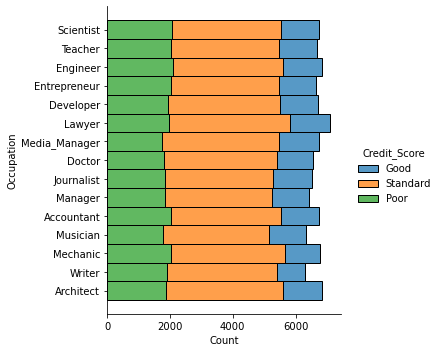

In [95]:
### Distribuição de credit score por ocupação

sns.displot(data=df_train, y="Occupation", hue="Credit_Score", multiple="stack")

Text(0.5, 0, 'Type_of_Loan')

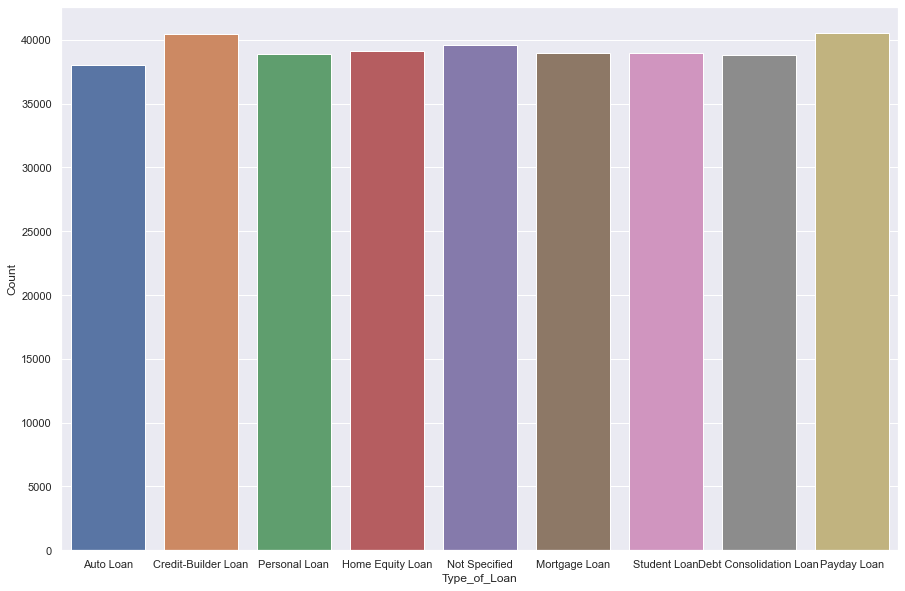

In [96]:
# Type of Loan

## Criando um dicionário para armazenar as contagens de todos os vários tipos de empréstimo

loan_type_dict = dict()
for value in loan_type_data:
    values = value.split(',')
    for each_value in values:
        loan_type = each_value.strip(' ')
        if 'and' in loan_type:
            loan_type = loan_type[4 : ]
        if loan_type in loan_type_dict:
            loan_type_dict[loan_type] += 1
        else:
            loan_type_dict[loan_type] = 1

loan_type_dict

### Grafico mostrando a quantidade de cada coluna - Type_of_Loan

sns.set(rc = {'figure.figsize': (15, 10)})
sns.barplot(list(loan_type_dict.keys()), list(loan_type_dict.values()))
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Type_of_Loan', fontsize = 12)

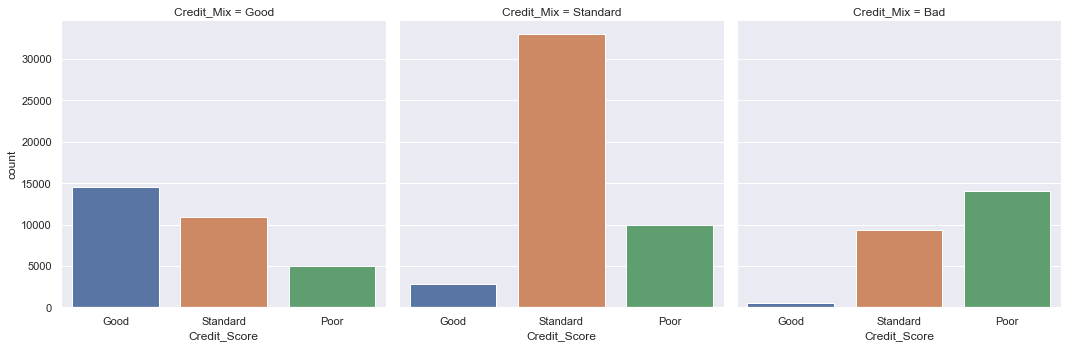

In [97]:
### Distribuição do Credit_Score por cada Credit_Mix

sns.factorplot('Credit_Score', col = 'Credit_Mix', data = df_train, kind = 'count', col_wrap = 3)

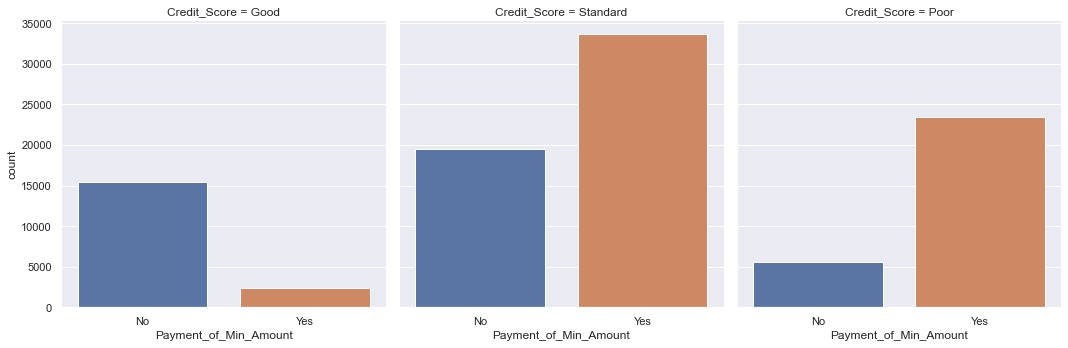

In [98]:
### Distribuição de Payment_of_Min_Amount para cada Credit Score

sns.factorplot('Payment_of_Min_Amount', col = 'Credit_Score', data = df_train, kind = 'count', col_wrap = 3)

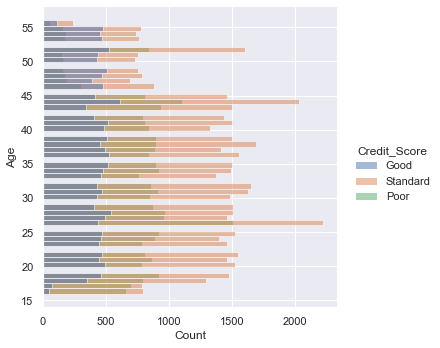

In [99]:
# Distribuição de Idade por Credit Score

sns.displot(data=df_train, y="Age", hue="Credit_Score")

Text(0.5, 1.0, 'Customer Monthly Inhand Salary by Credit Score')

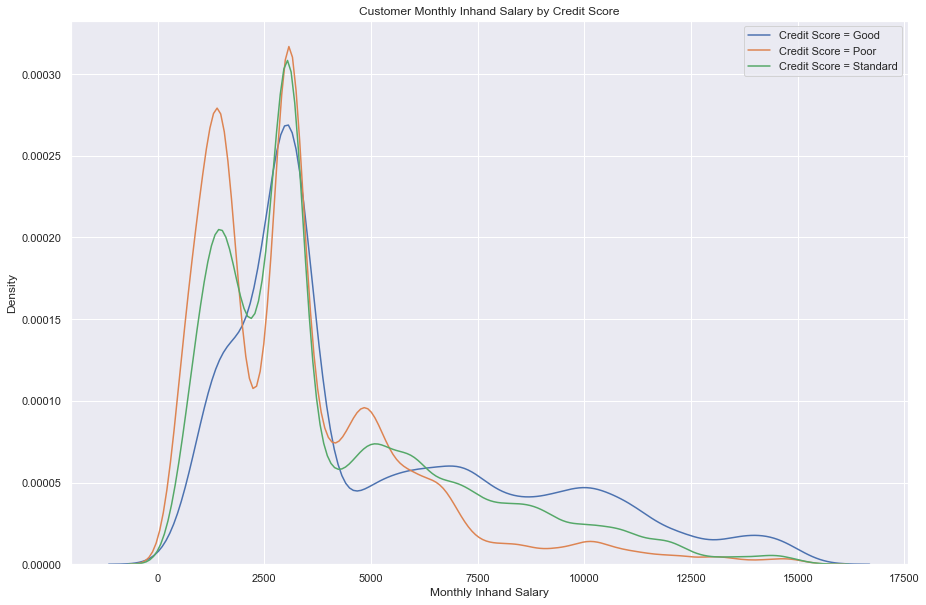

In [100]:

sns.kdeplot(df_train['Monthly_Inhand_Salary'][df_train['Credit_Score'] == 'Good'], label = 'Credit Score = Good')
sns.kdeplot(df_train['Monthly_Inhand_Salary'][df_train['Credit_Score'] == 'Poor'], label = 'Credit Score = Poor')
sns.kdeplot(df_train['Monthly_Inhand_Salary'][df_train['Credit_Score'] == 'Standard'], label = 'Credit Score = Standard')
plt.xlabel('Monthly Inhand Salary')
plt.legend()
plt.title('Customer Monthly Inhand Salary by Credit Score')

Text(0.5, 1.0, "Customer's Outstanding Debt by Credit Score")

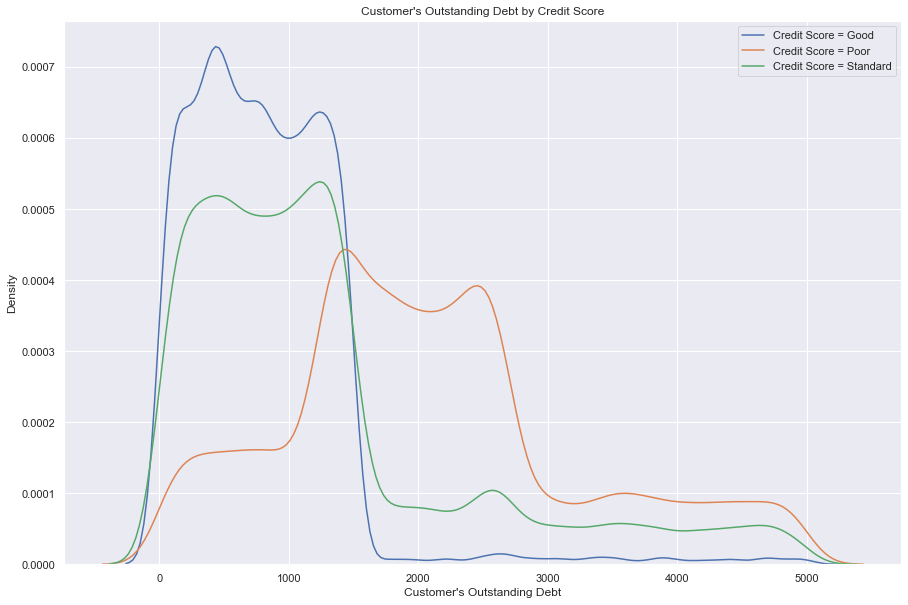

In [101]:
sns.kdeplot(df_train['Outstanding_Debt'][df_train['Credit_Score'] == 'Good'], label = 'Credit Score = Good')
sns.kdeplot(df_train['Outstanding_Debt'][df_train['Credit_Score'] == 'Poor'], label = 'Credit Score = Poor')
sns.kdeplot(df_train['Outstanding_Debt'][df_train['Credit_Score'] == 'Standard'], label = 'Credit Score = Standard')
plt.xlabel("Customer's Outstanding Debt")
plt.legend()
plt.title("Customer's Outstanding Debt by Credit Score")

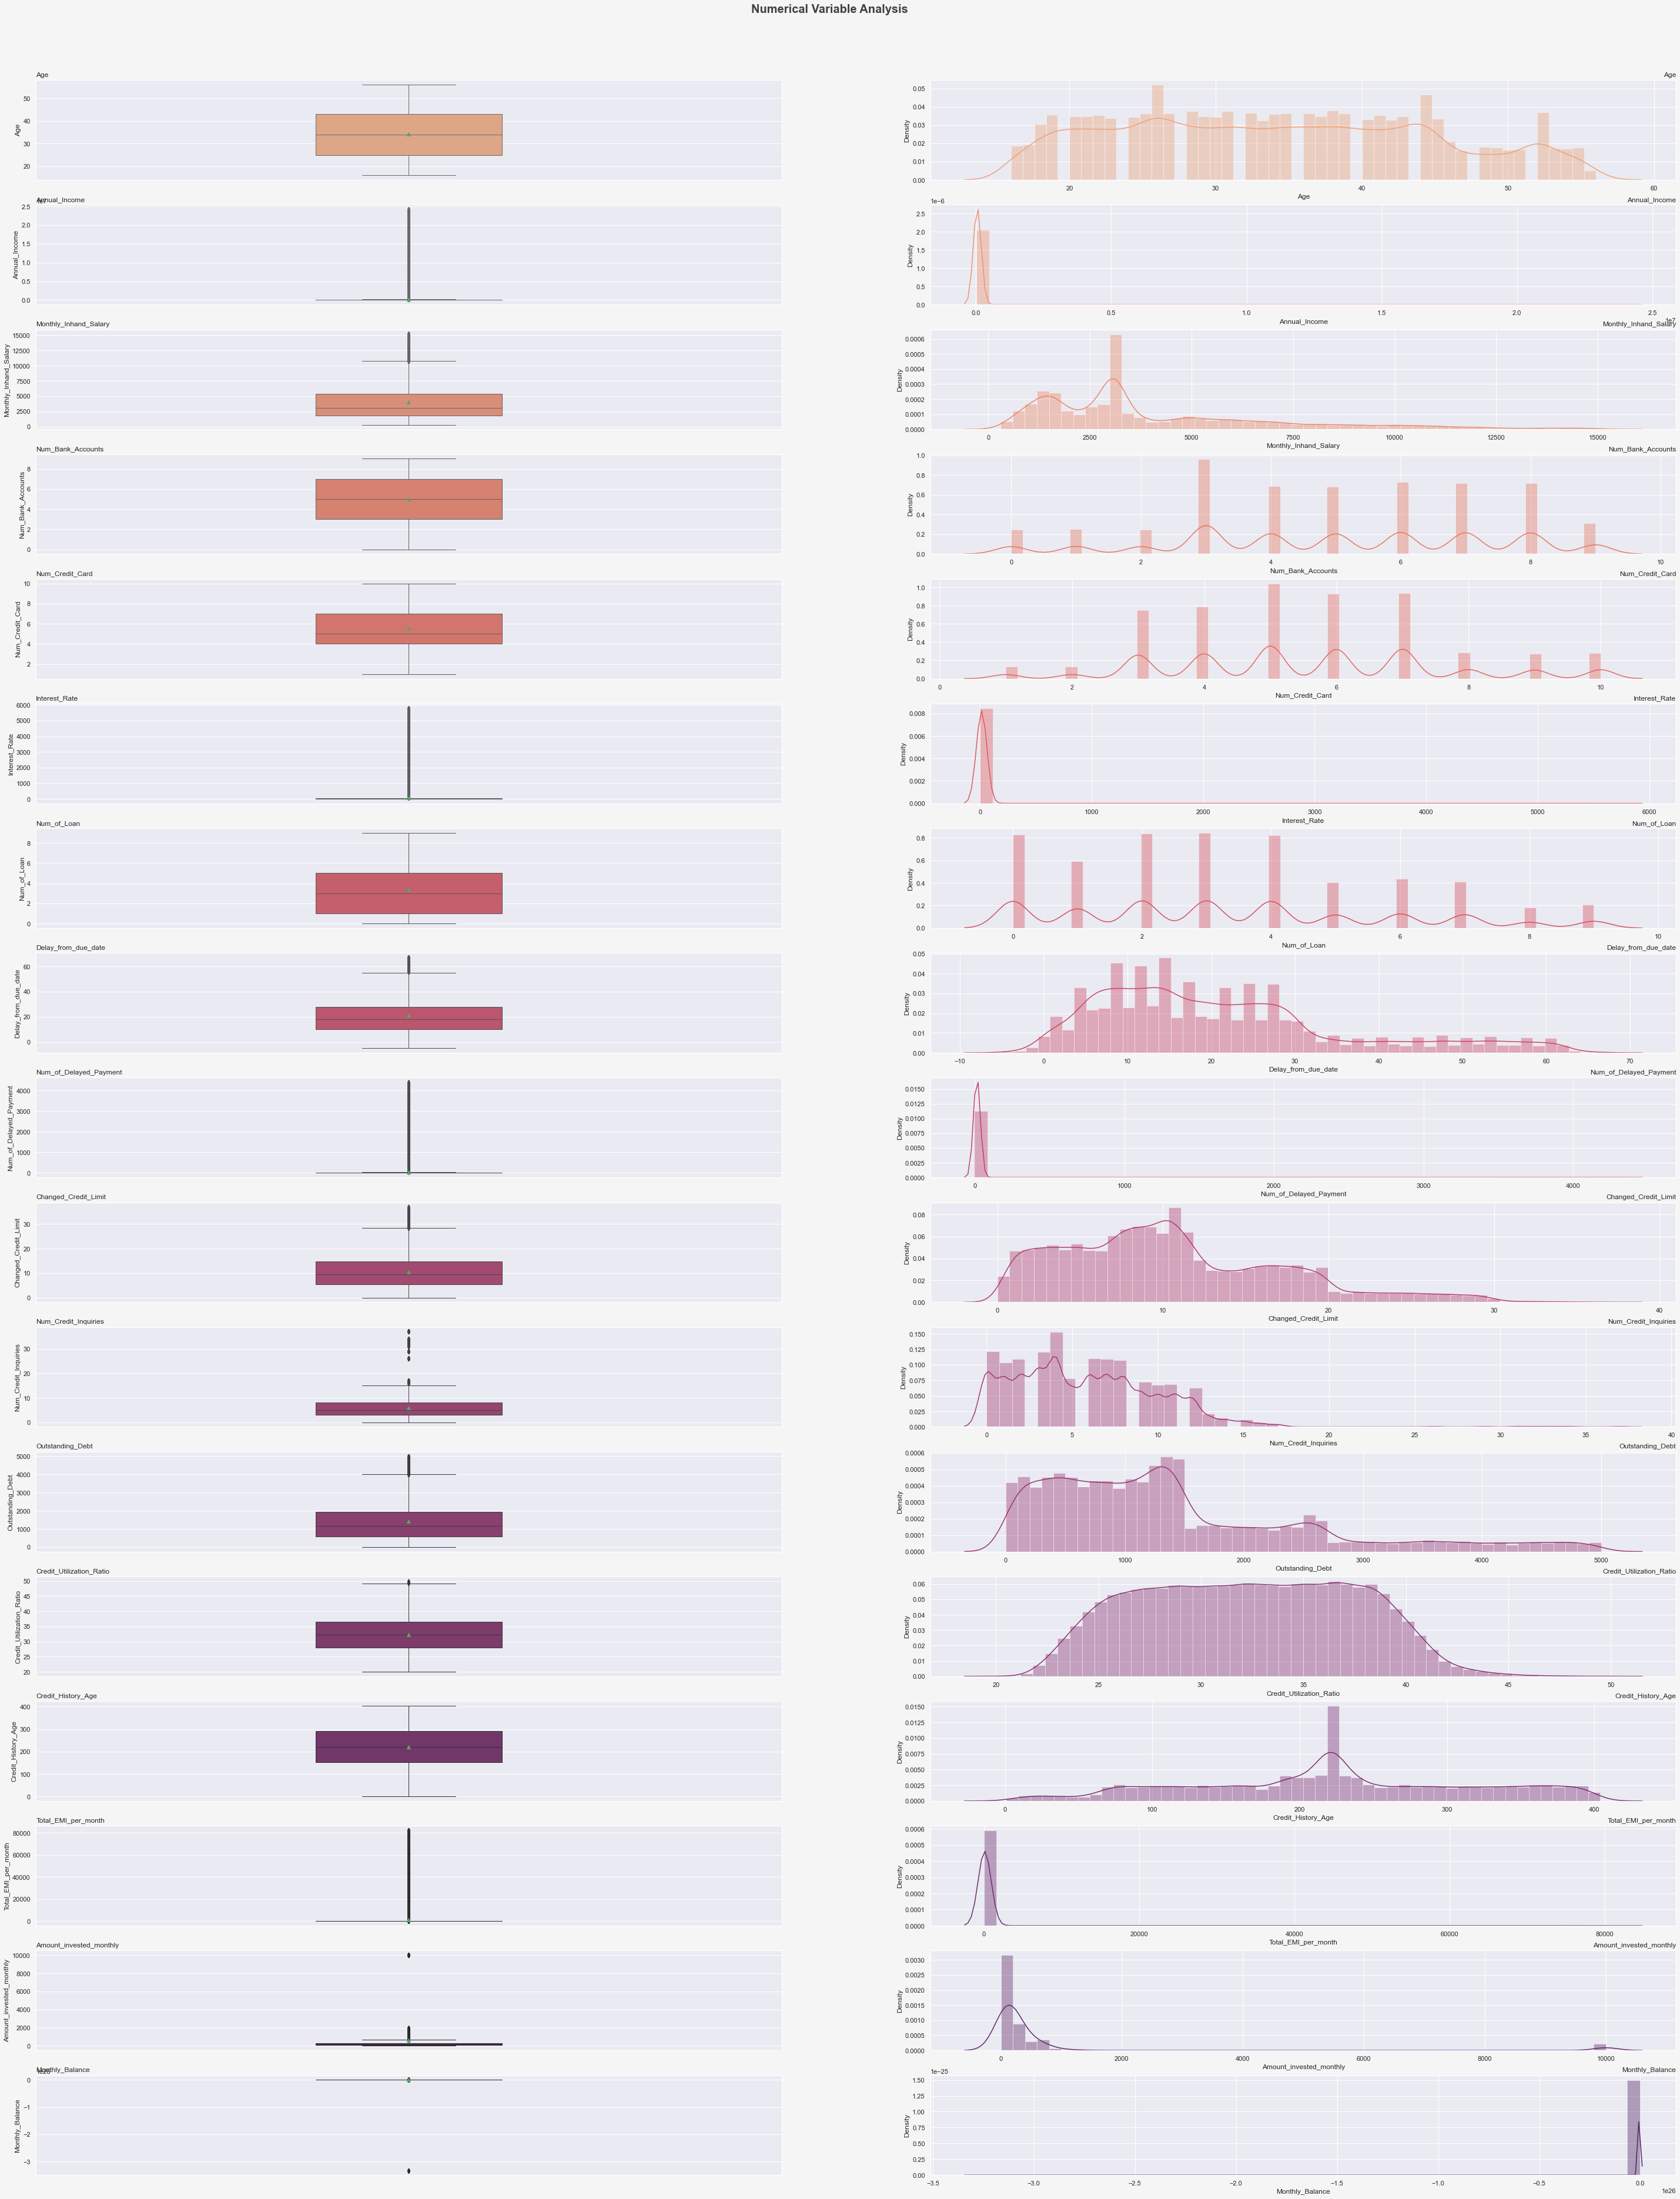

In [102]:
numerical_columns = [col for col in df_train.columns if df_train[col].dtype != 'category' and df_train[col].dtype !='object']

# size
figure, axis = plt.subplots(figsize = (50,60))

#Background
background = "#f5f5f5"
figure.set_facecolor(background)

#Color pallete
color_palette = sns.color_palette('flare', len(numerical_columns) * 2)

#Title
plt.suptitle("Numerical Variable Analysis", fontsize = 20, color = "#404040", fontweight = 600)

#Structure plot
lines = len(numerical_columns)
columns = 2
position = 1

for column in numerical_columns:

    #Boxplot
    plt.subplot(lines, columns, position)

    #Title
    plt.title(f'{column}', loc = 'left', fontsize = 12, fontweight = 200)

    #plot
    sns.boxplot(data = df_train, y = column, showmeans = True, saturation = 0.75,
                linewidth=1, color = color_palette[position], width = 0.25)

    #change position
    position += 1

    #Distplot
    plt.subplot(lines, columns, position)

    #Title
    plt.title(f'{column}', loc = 'right', fontsize = 12, fontweight = 200)

    sns.distplot(df_train[column], color = color_palette[position-1])

    #change position
    position += 1

#Adjust Grid
plt.subplots_adjust(top = .95, hspace = 0.25)

<AxesSubplot:>

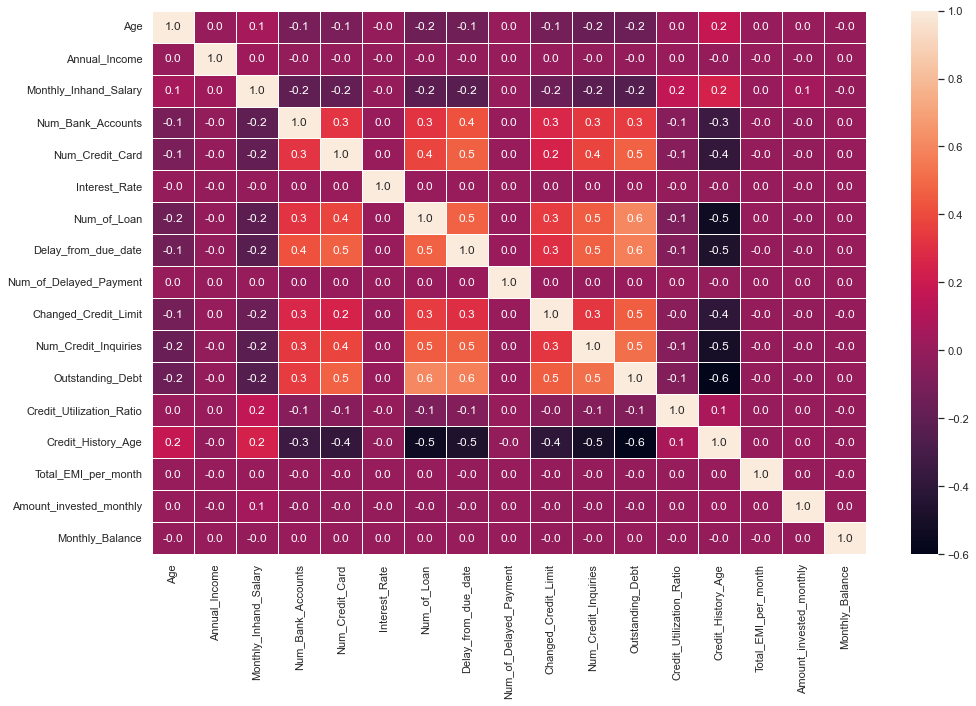

In [103]:

correlation = df_train.corr()
# plot da matriz de correlação

plt.figure(figsize=(16,10))
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

## 5. Detect, and Clean Outliers

Apesar de já termos corrigido alguns valores, ainda pudemos ver nos gráficos acima outliers, vamos trata-los.

In [104]:
def limites(coluna):
    q1 = coluna.quantile(0.10)
    q3 = coluna.quantile(0.90)
    amplitude = q3 - q1
    return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude
def excluir_outliers(df, nome_coluna):
    qtde_linhas = df.shape[0]
    lim_inf, lim_sup = limites(df[nome_coluna])
    df = df.loc[(df[nome_coluna] >= lim_inf) & (df[nome_coluna] <= lim_sup), :]
    linhas_removidas = qtde_linhas - df.shape[0]
    return df,  linhas_removidas



for col in numerical_columns:
    if col != 'Credit_History_Age':
        df_train ,linhas_removidas = excluir_outliers(df_train, col)
        print('{} : {} linhas removidas'.format(col, linhas_removidas))



Age : 0 linhas removidas
Annual_Income : 998 linhas removidas
Monthly_Inhand_Salary : 0 linhas removidas
Num_Bank_Accounts : 0 linhas removidas
Num_Credit_Card : 0 linhas removidas
Interest_Rate : 2011 linhas removidas
Num_of_Loan : 0 linhas removidas
Delay_from_due_date : 0 linhas removidas
Num_of_Delayed_Payment : 709 linhas removidas
Changed_Credit_Limit : 0 linhas removidas
Num_Credit_Inquiries : 379 linhas removidas
Outstanding_Debt : 0 linhas removidas
Credit_Utilization_Ratio : 0 linhas removidas
Total_EMI_per_month : 3612 linhas removidas
Amount_invested_monthly : 4036 linhas removidas
Monthly_Balance : 57 linhas removidas


Apesar de termos excluido os outliers da base, ainda temos uma base bem robusta.

In [105]:
df_train.shape

(88198, 24)

In [106]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88198 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     88198 non-null  object 
 1   Age                       88198 non-null  int32  
 2   Occupation                88198 non-null  object 
 3   Annual_Income             88198 non-null  float64
 4   Monthly_Inhand_Salary     88198 non-null  float64
 5   Num_Bank_Accounts         88198 non-null  int64  
 6   Num_Credit_Card           88198 non-null  int64  
 7   Interest_Rate             88198 non-null  int64  
 8   Num_of_Loan               88198 non-null  int32  
 9   Type_of_Loan              88198 non-null  object 
 10  Delay_from_due_date       88198 non-null  int64  
 11  Num_of_Delayed_Payment    88198 non-null  float64
 12  Changed_Credit_Limit      88198 non-null  float64
 13  Num_Credit_Inquiries      88198 non-null  float64
 14  Credit

## 6. Data Preprocessing


### Feature encoding

In [107]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
for column in df_train.columns:
  if df_train[column].dtypes == 'object':
    df_train[column] = ordinal_encoder.fit_transform(df_train[[column]])




In [108]:
df_train.fillna(0, inplace=True)

In [109]:
X = df_train.copy()
y = X.pop("Credit_Score")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

discrete_features = X.dtypes == int

from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)

Annual_Income               0.619682
Outstanding_Debt            0.609425
Total_EMI_per_month         0.559550
Monthly_Inhand_Salary       0.503636
Type_of_Loan                0.327931
Credit_Mix                  0.176982
Interest_Rate               0.173763
Delay_from_due_date         0.123353
Payment_of_Min_Amount       0.110821
Num_Credit_Inquiries        0.108018
Changed_Credit_Limit        0.097090
Num_Credit_Card             0.096576
Credit_History_Age          0.092228
Num_of_Delayed_Payment      0.084011
Num_Bank_Accounts           0.080461
Num_of_Loan                 0.078546
Monthly_Balance             0.031988
Age                         0.023075
Amount_invested_monthly     0.008735
Payment_Behaviour           0.007736
Month                       0.000151
Occupation                  0.000018
Credit_Utilization_Ratio    0.000000
Name: MI Scores, dtype: float64


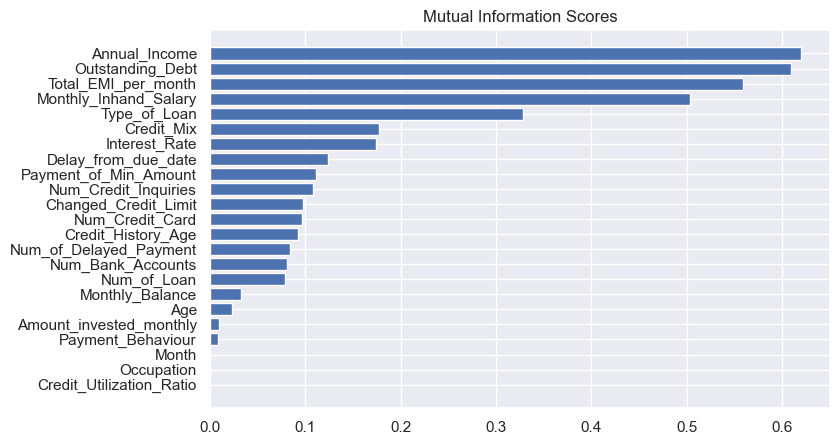

In [110]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

print(mi_scores)
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [111]:
df_train = df_train.drop(['Month',
                'Occupation','Credit_Utilization_Ratio',
                 'Payment_Behaviour', 'Amount_invested_monthly', 'Payment_Behaviour'], axis=1)

In [112]:
df_train.Credit_Score.value_counts()

2.0    47009
1.0    25799
0.0    15390
Name: Credit_Score, dtype: int64

### Padronização

In [113]:
X = df_train.copy()
X.drop(columns='Credit_Score', inplace=True)

y = df_train['Credit_Score']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=1, stratify=y)

In [115]:
numerical_cols = [col for col in X_train.columns if X_train[col].dtype != 'category' and X_train[col].dtype !='object']

In [116]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

In [117]:
y_train = y_train.astype('int')

In [118]:
df_train.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Monthly_Balance', 'Credit_Score'],
      dtype='object')

### Balanceamento das classes

In [119]:
#Tamanho antes do balanceamento

np.bincount(y_train)

array([12312, 20639, 37607], dtype=int64)

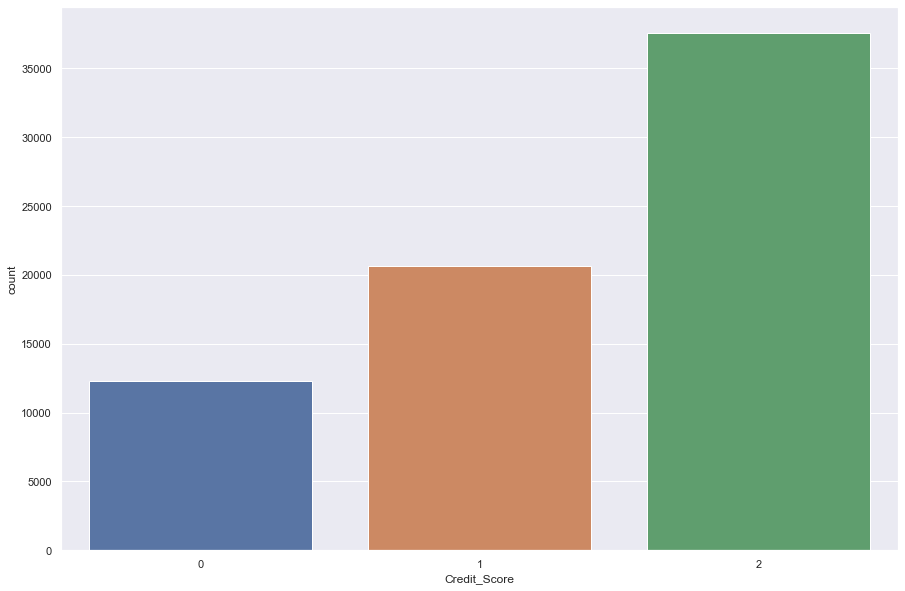

In [120]:
ax = sns.countplot(x=y_train)

In [121]:
# Balanceamento

oversample = SMOTE()

sm = SMOTE(random_state=3)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

In [122]:
# Tamanho após balanceamento

np.bincount(y_train)

array([37607, 37607, 37607], dtype=int64)

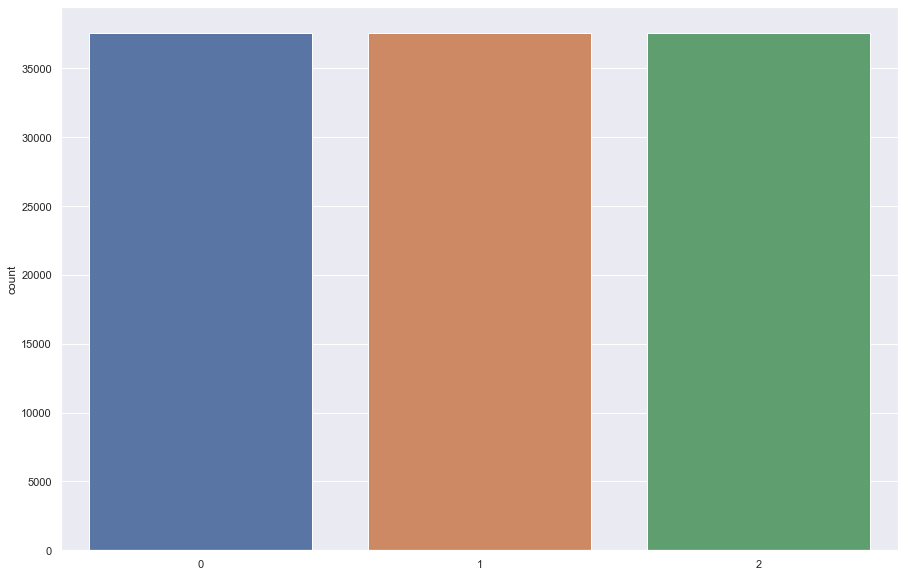

In [123]:
ax = sns.countplot(x=y_train)

# 7. Modelling

- Métricas de Avaliação

Vamos usar aqui a acurácia, precisão e f1 score que vai nos dizer o quão bem o nosso modelo consegue explicar o target. Isso seria um ótimo parâmetro para ver o quão bom é nosso modelo

-> Quanto mais próximo de 100%, melhor

In [124]:
def avaliar_modelo(nome_modelo, y_test, previsao):
    Accuracy = accuracy_score(y_test, previsao)
    CR = classification_report(y_test, previsao)
    return f"Modelo\033[1m {nome_modelo}\033[0m:\nAccuracy:{Accuracy:.2%}\nClassification Report:\n{CR}"

- Escolha dos Modelos a Serem Testados

DecisionTree
LogisticRegression
RandomForestClassifier

Esses são alguns dos modelos que existem que têm o propósito de classificar características de um sistema de dados, de modo a associar um conjunto de observações sob a mesma caracterização. 

In [125]:
modelo_dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
modelo_lr = LogisticRegression()
modelo_rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
modelo_et = ExtraTreesClassifier(n_estimators = 100,bootstrap = True)

modelos = {'DecisionTree': modelo_dt,
          'LogisticRegression': modelo_lr,
          'RandomForest': modelo_rf,
           'ExtraTreesClassifier': modelo_et
          }

- Separa os dados em treino e teste + Treino do Modelo

Essa etapa é crucial. As Inteligências Artificiais aprendendo com o que chamamos de treino.

Basicamente o que a gente faz é: a gente separa as informações em treino e teste, ex: 10% da base de dados vai servir para teste e 90% para treino (normalmente treino é maior mesmo)

Aí, damos para o modelo os dados de treino, ele vai olhar aqueles dados e aprender a classificar os dados.

Depois que ele aprende, você faz um teste com ele, com os dados de teste, para ver se ela está bom ou não. Analisando os dados de teste você descobre o melhor modelo

In [126]:
for nome_modelo, modelo in modelos.items():
    #treinar
    modelo.fit(X_train, y_train)

### Análise do Melhor Modelo

In [127]:
 from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

for nome_modelo, modelo in modelos.items():
    #testar
    previsao = modelo.predict(X_test)
    print(avaliar_modelo(nome_modelo, y_test, previsao))

Modelo DecisionTree:
Accuracy:73.34%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.66      0.69      0.67      3078
         1.0       0.72      0.74      0.73      5160
         2.0       0.77      0.74      0.76      9402

    accuracy                           0.73     17640
   macro avg       0.72      0.72      0.72     17640
weighted avg       0.73      0.73      0.73     17640

Modelo LogisticRegression:
Accuracy:64.57%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.48      0.83      0.61      3078
         1.0       0.62      0.67      0.64      5160
         2.0       0.80      0.57      0.67      9402

    accuracy                           0.65     17640
   macro avg       0.63      0.69      0.64     17640
weighted avg       0.69      0.65      0.65     17640

Modelo RandomForest:
Accuracy:80.64%
Classification Report:
              precision    recall  f1-score   suppor

In [128]:
df = pd.DataFrame(X_train, columns=['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Monthly_Balance'])
df

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Monthly_Balance
0,-1.338021,0.859595,1.033312,0.415496,0.699577,0.162984,1.034560,-0.396397,1.809416,0.317342,2.185875,1.323783,-1.509166,1.430628,-1.804902,0.822653,1.282325,-0.239117
1,0.643461,0.596650,0.656733,0.415496,0.699577,0.620135,0.234945,1.112386,-0.679766,-0.078537,-0.262873,-1.442484,0.968266,-0.320936,1.768000,-1.215579,0.676956,0.354639
2,-0.866240,-0.886848,-0.982887,1.666752,-0.260721,1.648724,1.834176,-1.173382,0.127537,0.713222,0.689418,0.820826,-1.509166,2.797310,-1.731343,0.822653,-0.375118,-0.608286
3,-0.771883,-1.072258,-1.067631,0.832581,0.699577,-0.179879,1.034560,-0.196916,0.127537,-0.870295,0.248039,0.066389,0.968266,0.151439,-0.722523,0.822653,-0.567702,-0.530509
4,0.454748,2.073424,-0.307662,0.832581,0.219428,-0.979892,-1.364287,0.226293,-0.410665,-0.606376,-0.420077,-1.191005,-0.270450,-0.809102,0.254771,-1.215579,-0.970126,3.446517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112816,-0.017033,-0.894406,-0.596364,0.832581,1.179727,0.277272,2.233984,0.701300,-0.109024,0.053423,1.764146,1.558855,-1.509166,2.478661,-2.104910,0.822653,0.019632,-0.883836
112817,-0.488814,0.008845,0.141666,0.832581,0.219428,0.962998,1.434368,0.266520,1.876692,0.963718,0.701511,1.323783,0.968266,1.036425,-0.187657,0.822653,0.937146,-0.527327
112818,1.020886,-0.568622,-0.528365,-0.835761,2.140025,0.048697,1.434368,0.947070,-0.545215,0.374847,0.154321,0.820826,0.968266,0.460403,-1.024347,0.822653,0.150039,-0.435381
112819,0.171680,-0.496116,-0.560328,0.415496,1.659876,1.077286,1.034560,1.506940,1.809416,0.717532,-1.003544,-1.360351,-1.509166,2.925526,-1.573028,0.822653,0.417887,-0.799328


,0
Outstanding_Debt,11.743768
Interest_Rate,9.205515
Credit_History_Age,7.556823
Delay_from_due_date,7.421032
Credit_Mix,6.355429
Num_Credit_Inquiries,5.530903
Payment_of_Min_Amount,5.200780
Changed_Credit_Limit,5.188470
Monthly_Balance,5.120275
Num_Credit_Card,4.617639


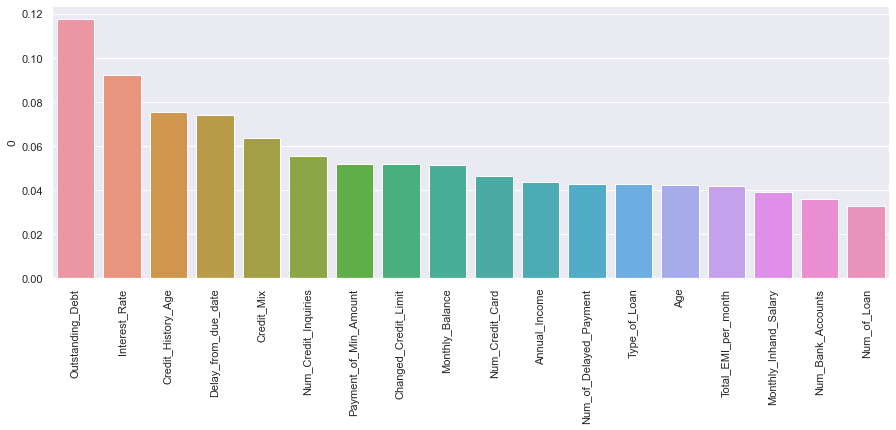

In [129]:
# print(rfc.feature_importances_)
# print(X_train.columns)

importancia_features = pd.DataFrame(modelo_rf.feature_importances_, df.columns)

importancia_features=importancia_features.sort_values(by=0, ascending=False)
display(importancia_features*100)

plt.figure(figsize=(15, 5))
ax = sns.barplot(x=importancia_features.index, y=importancia_features[0])
ax.tick_params(axis='x', rotation=90)

In [130]:
data, target = df_train.drop(columns = ['Credit_Score']), df_train['Credit_Score']

scores = cross_val_score(modelo_rf, data, target, cv=5, scoring='accuracy')

# Results
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.69 (+/- 0.01)


In [131]:
print(scores.min().round(2),scores.mean().round(2), scores.max().round(2))

0.69 0.69 0.7


In [133]:
#Para exportar:

import pickle


output = open('modelo_rf', 'wb')

pickle.dump(modelo_rf, output)

output.close()


# TESTE

In [166]:
dfteste = pd.read_csv('test.csv')
df=dfteste

In [141]:
# Tirar caracteres especiais

df = df.applymap(lambda x: x if x is np.NaN or not isinstance(x, str) else str(x).strip('_ ,"')).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)

#Alterar o tipo dos dados

df.Age = df.Age.astype(int)
df.Annual_Income = df.Annual_Income.astype(float)
df.Num_of_Loan = df.Num_of_Loan.astype(int)
df.Num_of_Delayed_Payment = df.Num_of_Delayed_Payment.astype(float)
df.Changed_Credit_Limit = df.Changed_Credit_Limit.astype(float)
df.Outstanding_Debt = df.Outstanding_Debt.astype(float)
df.Amount_invested_monthly = df.Amount_invested_monthly.astype(float)
df.Monthly_Balance = df.Monthly_Balance.astype(float)

# Tranformando a coluna de tempo de histórico de crédito de texto para tempo 

nd= df.copy()
nd['Credit_History_Age'] = nd['Credit_History_Age'].replace('nan', np.nan).fillna(0)   
nd['Credit_History_Age'] = nd['Credit_History_Age'].astype(str)                       
nd['History_Year'] = nd['Credit_History_Age'].str[ :2]          
nd['History_Month'] = nd['Credit_History_Age'].str[ -9:-7] 

nd['History_Year'] = pd.to_numeric(nd['History_Year']) 
nd['History_Month'] = pd.to_numeric(nd['History_Month']) 
nd['Credit_History_Age'] = nd['History_Year']*12 + nd['History_Month'] 
nd = nd.drop(['History_Year'], axis = 1)  
nd = nd.drop(['History_Month'], axis = 1)
df = nd

df= df.drop(['Month',
                'Occupation','Credit_Utilization_Ratio',
                 'Payment_Behaviour', 'Amount_invested_monthly', 'Payment_Behaviour'], axis=1)

def cleaning_Null_columns(df_column,method,headlines):
  print('Antes: \n',)
  print(df_column.value_counts(dropna = False).head(headlines))
  print('\n-----------------------------------\n')
  print('Depois: \n')
  df_column.fillna(method = method, inplace = True)
  return df_column.value_counts(dropna = False)

cleaning_Null_columns(df['Credit_Mix'],'ffill',40)
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].fillna(df['Monthly_Inhand_Salary'].median())
df['Credit_History_Age'] = df['Credit_History_Age'].fillna(df['Credit_History_Age'].mean())
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(df['Num_of_Delayed_Payment'].mean())
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].fillna(df['Changed_Credit_Limit'].mean())
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].fillna(0)
df['Monthly_Balance'] = df['Monthly_Balance'].fillna(0)
df.drop(['ID', 'Customer_ID', 'Name', 'SSN'], axis = 1, inplace = True)

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
for column in df.columns:
  if df[column].dtypes == 'object':
    df[column] = ordinal_encoder.fit_transform(df[[column]])
df.fillna(0, inplace=True)
X = df.copy()

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

    
    


Antes: 

Standard    18379
Good        12260
NaN          9805
Bad          9556
Name: Credit_Mix, dtype: int64

-----------------------------------

Depois: 



In [161]:
import pickle

modelo = open('modelo_rf','rb')

lr_negociacao = pickle.load(modelo)

modelo.close()

previsao = lr_negociacao.predict(X)


In [162]:
previsao

array([2, 2, 2, ..., 2, 2, 2])

In [164]:
y =  pd.DataFrame(previsao, columns=['Credit_Score'])

y

,Credit_Score
0,2
1,2
2,2
3,2
4,2
...,...
49995,2
49996,2
49997,2
49998,2


In [169]:
output = pd.DataFrame({'Customer_ID': dfteste.Customer_ID, 'prediction': previsao})
output.to_excel('submission.xlsx', index=False)
print("Your submission was successfully saved!")


Your submission was successfully saved!


In [170]:
output.prediction.value_counts()

2    48876
1     1124
Name: prediction, dtype: int64